# Module: calibration

This module contains functions for calibration of 4DSTEM data, including calibrating pixel sizes, calibrating the rotational offset between the real and diffraction planes, correcting diffraction shifts, and correcting elliptical distortions.

### Calibrate Q pixel size, no beam stop

This notebook calibrates the pixel size in the diffraction plane for data without a beam stop.

### Import packages, load data

In [2]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import leastsq

from py4DSTEM.file.io import read
from py4DSTEM.process.utils import radial_integral, get_maxima_1D

In [4]:
# Get data

fp_braggpeaks = "/home/ben/Data/20190302_calibrationData_Al_standards/NoBeamStop__from_20190307_LiFePO4_100percentLithiated/processing_from_lauren/300mm/Al_Probe_cl-300mm_Bragg_disks_shift_corrected.h5"
fp_braggvectormap = "/home/ben/Data/20190302_calibrationData_Al_standards/NoBeamStop__from_20190307_LiFePO4_100percentLithiated/processing_from_lauren/300mm/Al_Probe_cl-300mm_deconvolution.h5"

braggpeaks = read(fp_braggpeaks)
braggvectormap = read(fp_braggvectormap)

R_Nx,R_Ny = braggpeaks.shape
Q_Nx,Q_Ny = 1024,1024

/home/ben/Data/20190302_calibrationData_Al_standards/NoBeamStop__from_20190307_LiFePO4_100percentLithiated/processing_from_lauren/300mm/Al_Probe_cl-300mm_Bragg_disks_shift_corrected.h5 is a py4DSTEM file, v0.2. Reading...
/home/ben/Data/20190302_calibrationData_Al_standards/NoBeamStop__from_20190307_LiFePO4_100percentLithiated/processing_from_lauren/300mm/Al_Probe_cl-300mm_deconvolution.h5 is a py4DSTEM file, v0.2. Reading...


### Calibrate

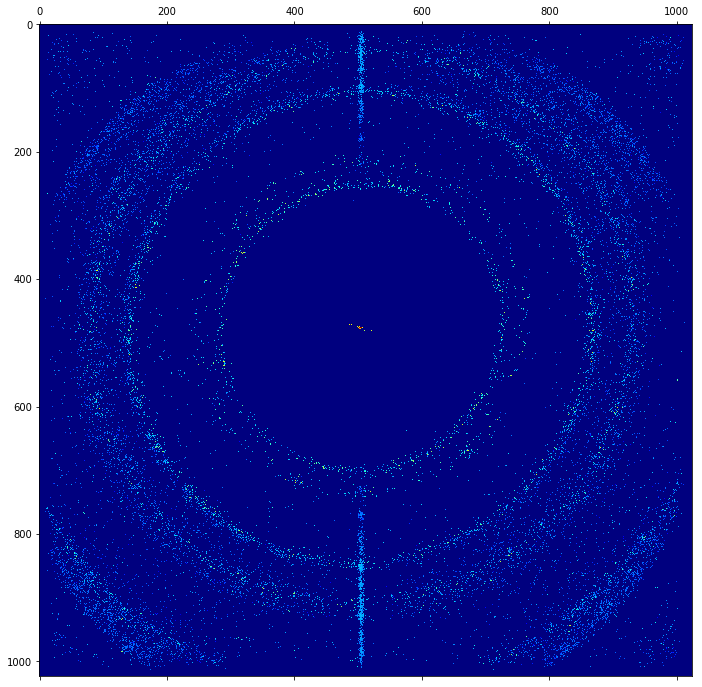

In [5]:
fig,ax = plt.subplots(figsize=(12,12))
ax.matshow(braggvectormap.data**0.1,cmap='jet')
plt.show()

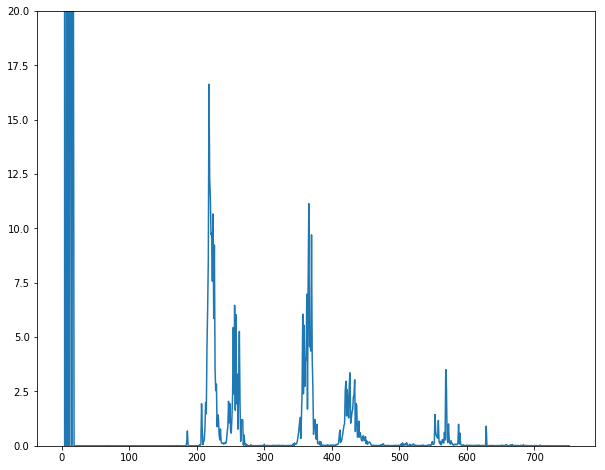

In [6]:
# Get radial profile

ymax=20

x0,y0 = np.unravel_index(np.argmax(gaussian_filter(braggvectormap.data,2)),(Q_Nx,Q_Ny))
radial_profile = radial_integral(braggvectormap.data,x0,y0)[0]

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(np.arange(len(radial_profile)),radial_profile)
ax.set_ylim(0,ymax)
plt.show()

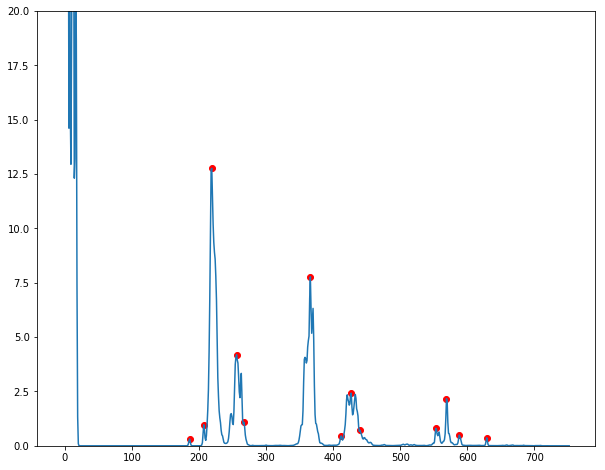

In [7]:
# Get radial profile maxima

sigma = 1
minSpacing = 10
minRelativeIntensity = 0.01
relativeToPeak = 1

ymax=20

maxima = get_maxima_1D(radial_profile, sigma=sigma, minSpacing=minSpacing,
                       minRelativeIntensity=minRelativeIntensity,
                       relativeToPeak=relativeToPeak)

# Show
profile_smoothed = gaussian_filter(radial_profile,sigma)
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(np.arange(len(profile_smoothed)),profile_smoothed)
ax.scatter(maxima,profile_smoothed[maxima],color='r')
ax.set_ylim(0,ymax)
plt.show()

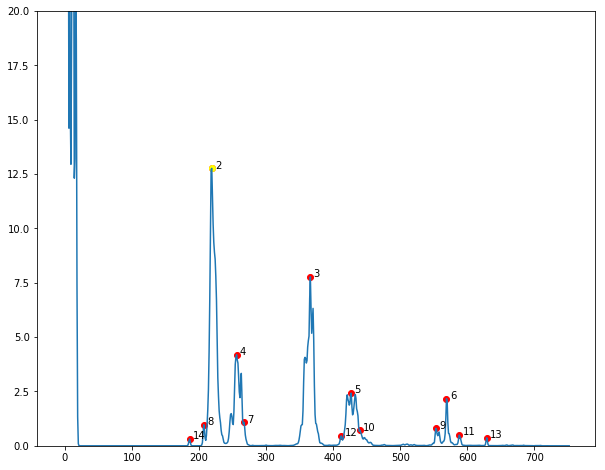

In [8]:
# Select peak

selected_index = 2
ymax = 20

# Show
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(np.arange(len(profile_smoothed)),profile_smoothed)
ax.scatter(maxima,profile_smoothed[maxima],color='r')
for i in range(len(maxima)):
    if profile_smoothed[maxima[i]] < ymax:
        ax.text(maxima[i]+5,profile_smoothed[maxima[i]],'{}'.format(i))
ax.scatter(maxima[selected_index],profile_smoothed[maxima[selected_index]],color='yellow')
ax.set_ylim(0,ymax)
plt.show()

In [54]:
# Calibrate

d_spacing_invA = 5

#invA_per_pixel = d_spacing_invA / maxima[selected_index]
invA_per_pixel = d_spacing_invA / r_selected